# 概述

把数据存储于普通的column列也能用于数据查询，那使用index有什么好处？

index的用途总结：
* 1、更方便的数据查询
* 2、使用index可以获得性能提升
* 3、自动的数据对齐功能
* 4、更多更强大的数据结构支持

# 读取数据

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./datas/ratings.csv')

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df.count()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

# 使用index查询数据

In [5]:
# drop=False，让索引列还保持在column
df.set_index('userId',inplace=True,drop=False)

In [6]:
df.head()

,userId,movieId,rating,timestamp
userId,,,,
1,1,1,4.0,964982703
1,1,3,4.0,964981247
1,1,6,4.0,964982224
1,1,47,5.0,964983815
1,1,50,5.0,964982931


In [7]:
df.index

Int64Index([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
            ...
            610, 610, 610, 610, 610, 610, 610, 610, 610, 610],
           dtype='int64', name='userId', length=100836)

In [8]:
# 使用column的condition的查询方法
df.loc[df['userId']==500].head()

,userId,movieId,rating,timestamp
userId,,,,
500,500,1,4.0,1005527755
500,500,11,1.0,1005528017
500,500,39,1.0,1005527926
500,500,101,1.0,1005527980
500,500,104,4.0,1005528065


In [9]:
# 使用index的查询方法
df.loc[500].head()

,userId,movieId,rating,timestamp
userId,,,,
500,500,1,4.0,1005527755
500,500,11,1.0,1005528017
500,500,39,1.0,1005527926
500,500,101,1.0,1005527980
500,500,104,4.0,1005528065


# 使用index会提升性能
* 如果index是唯一的，Pandas会使用哈希表优化，查询性能为O(1)
* 如果index不是唯一的，但是有序，Pandas会使用二分查找算法，查询性能为O(logN)
* 如果index是完全随机的，那么每次查询都要扫描全表，查询性能为O(N)

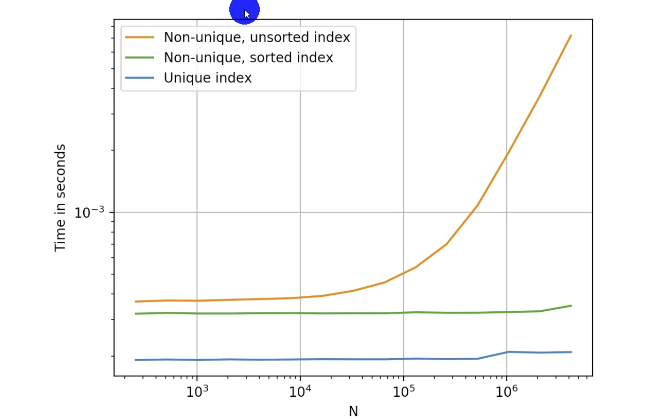

## 实验1:完全随机的顺序查询

In [10]:
# 将数据随机打散
from sklearn.utils import shuffle
df_shuffle = shuffle(df)

In [11]:
df_shuffle.head()

,userId,movieId,rating,timestamp
userId,,,,
64,64,1517,4.0,1161520656
414,414,2763,2.0,961437096
181,181,61,4.0,845472115
577,577,593,4.0,945966689
414,414,3997,2.0,992878701


In [12]:
# 索引是否是递增的
df_shuffle.index.is_monotonic_increasing

False

In [13]:
# 索引是否是唯一的
df_shuffle.index.is_unique

False

In [14]:
# 计时，查询id=500数据性能
%timeit df_shuffle.loc[500]

353 µs ± 8.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 将index排序后的查询

In [15]:
df_sorted = df_shuffle.sort_index()

In [16]:
df_sorted.head()

,userId,movieId,rating,timestamp
userId,,,,
1,1,1256,5.0,964981442
1,1,1408,3.0,964982310
1,1,2997,4.0,964980896
1,1,3809,4.0,964981220
1,1,356,4.0,964980962


In [20]:
# 索引是否是递增的
df_sorted.index.is_monotonic_increasing

True

In [18]:
# 索引是否是唯一的
df_sorted.index.is_unique

False

In [19]:
# 计时，查询id=500数据性能
%timeit df_sorted.loc[500]

190 µs ± 7.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# 使用index能自动对齐数据
包括series和datgaFrame

In [21]:
s1 = pd.Series([1,2,3],index= list('abc'))

In [22]:
s1

a    1
b    2
c    3
dtype: int64

In [23]:
s2 = pd.Series([2,3,4],index=list('bcd'))

In [24]:
s2

b    2
c    3
d    4
dtype: int64

In [25]:
s1+s2

a    NaN
b    4.0
c    6.0
d    NaN
dtype: float64

# 使用index更多更强大的数据结构支持

***很多欠打的索引数据结构***

* CategoricallIndex,基于分类数据的Index,提升性能
* MulltiIndex,多维索引，用于groupby多维聚合后结果等
* DatatimeIndex,时间类型索引，强大的日期和时间的方法支持